In [195]:
import pandas as pd
import matplotlib.pyplot as plt

In [196]:
data = pd.read_excel('Registro_Excel.xlsx')
data.head()
print(data.shape)

(282, 10)


In [197]:
data = data.drop("Unnamed: 0", axis=1)
data['Ganancia'] = data['Ganancia'].astype(str)

In [198]:
ganancia = data[data['Ganancia'].str.isnumeric()]
ganancia['Ganancia'] = pd.to_numeric(ganancia['Ganancia']).astype('float')
ganancia = ganancia[ ganancia['Ganancia'] != 0 ]
ganancia['Fecha'] = pd.to_datetime(ganancia['Fecha'].astype(str), format='%Y-%m-%d %H:%M:%S')
print(ganancia.shape)
print(ganancia.dtypes)
ganancia.head()

(68, 9)
Usuario                object
Fecha          datetime64[ns]
Bet365(COP)           float64
Wplay                 float64
Codere                float64
Rushbet               float64
Retiros               float64
Total                 float64
Ganancia              float64
dtype: object


C:\Users\andres\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Usuario,Fecha,Bet365(COP),Wplay,Codere,Rushbet,Retiros,Total,Ganancia
3,Esteban SM,2019-12-22 12:00:00,479402.0,711500.0,0.0,0.0,0.0,1190902.0,246359.0
8,Yusbay MD,2019-12-22 12:00:00,0.0,1108000.0,0.0,0.0,0.0,1108000.0,64377.0
9,Esteban SM,2019-12-22 12:00:00,0.0,739000.0,0.0,0.0,0.0,739000.0,62649.0
14,Yusbay MD,2019-12-21 12:00:00,360738.0,863000.0,0.0,0.0,0.0,1223738.0,488240.0
20,Yusbay MD,2019-12-19 12:00:00,453603.0,176938.0,0.0,0.0,0.0,630541.0,128056.0


In [199]:
Yusbay = ganancia[ganancia['Usuario']=='Yusbay MD']
Esteban = ganancia[ganancia['Usuario']=='Esteban SM']
Andres = ganancia[ganancia['Usuario']=='Andres JG']

In [216]:
Yusbay['Fecha']

8     2019-12-22 12:00:00
14    2019-12-21 12:00:00
20    2019-12-19 12:00:00
26    2019-12-18 12:00:00
32    2019-12-17 20:00:00
38    2019-12-16 20:00:00
45    2019-12-13 10:00:00
50    2019-12-11 13:00:00
57    2019-12-10 10:00:00
63    2019-12-07 10:00:00
76    2019-12-06 09:00:00
85    2019-12-05 14:00:00
91    2019-12-04 14:00:00
96    2019-12-03 14:00:00
103   2019-11-30 14:00:00
110   2019-11-29 17:00:00
124   2019-11-26 15:00:00
130   2019-11-23 08:15:00
136   2019-11-22 08:15:00
142   2019-11-21 16:27:00
160   2019-11-16 09:00:00
172   2019-11-14 09:00:00
Name: Fecha, dtype: datetime64[ns]

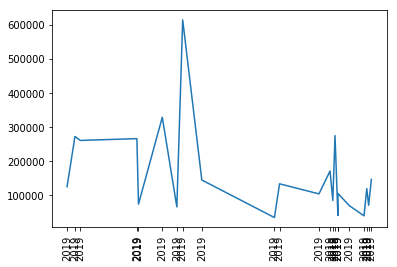

In [226]:
fig, ax = plt.subplots()
plt.xticks(Andres['Fecha'], rotation=90)
# plt.grid()

ax.plot_date(Andres['Fecha'], Andres['Ganancia'], marker='', linestyle='-')
#plt.plot(Andres['Fecha'], Yusbay['Ganancia'])
#fig.autofmt_xdate()
plt.show()